# Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
HealthInsCPSDF = pd.read_csv('COVID_HealthInsCPS.csv', index_col = 0)
HealthInsCPSDF.head()

,State,cases,deaths,Medicare Insurance Costs (2014),Medicaid Insurance Costs (2014),Private Health Insurance Costs (2014)
0,Alabama,26912,785,9723.0,4983.0,11078.0
1,Alaska,751,10,741.0,1359.0,2492.0
2,Arizona,39298,1228,11069.0,8371.0,15073.0
3,Arkansas,13191,188,5536.0,4960.0,6209.0
4,California,159098,5202,64795.0,61761.0,104018.0


In [3]:
HealthInsCPSDF.shape

(51, 6)

In [4]:
HealthInsCPSDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  51 non-null     object 
 1   cases                                  51 non-null     int64  
 2   deaths                                 51 non-null     int64  
 3   Medicare Insurance Costs (2014)        51 non-null     float64
 4   Medicaid Insurance Costs (2014)        51 non-null     float64
 5   Private Health Insurance Costs (2014)  51 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.8+ KB


In [5]:
HealthInsCPSDF.isnull().sum()

State                                    0
cases                                    0
deaths                                   0
Medicare Insurance Costs (2014)          0
Medicaid Insurance Costs (2014)          0
Private Health Insurance Costs (2014)    0
dtype: int64

In [6]:
HealthInsCPSDF.count()

State                                    51
cases                                    51
deaths                                   51
Medicare Insurance Costs (2014)          51
Medicaid Insurance Costs (2014)          51
Private Health Insurance Costs (2014)    51
dtype: int64

In [7]:
HealthInsCPSDF.describe()

,cases,deaths,Medicare Insurance Costs (2014),Medicaid Insurance Costs (2014),Private Health Insurance Costs (2014)
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,41994.235294,2290.549020,11383.960784,8758.843137,17159.862745
std,63513.183767,4748.588326,12998.484012,11472.789827,19316.800645
min,614.000000,10.000000,741.000000,534.000000,1928.000000
25%,9231.500000,212.000000,2909.500000,2219.500000,4244.500000
50%,20152.000000,704.000000,7410.000000,6038.000000,11078.000000
75%,46961.500000,2469.500000,12596.000000,8936.500000,21196.500000
max,389349.000000,30683.000000,64795.000000,61761.000000,104018.000000


## Pearson Correlation

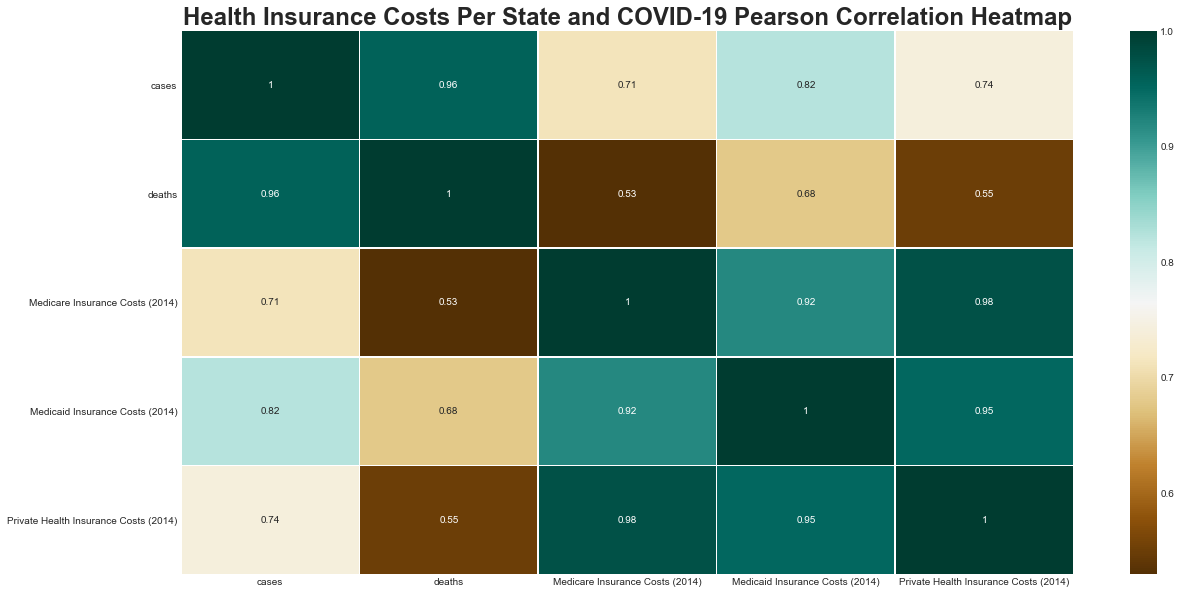

In [8]:
Pcorr = HealthInsCPSDF.corr(method = 'pearson')
Pcorr

plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Costs Per State and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

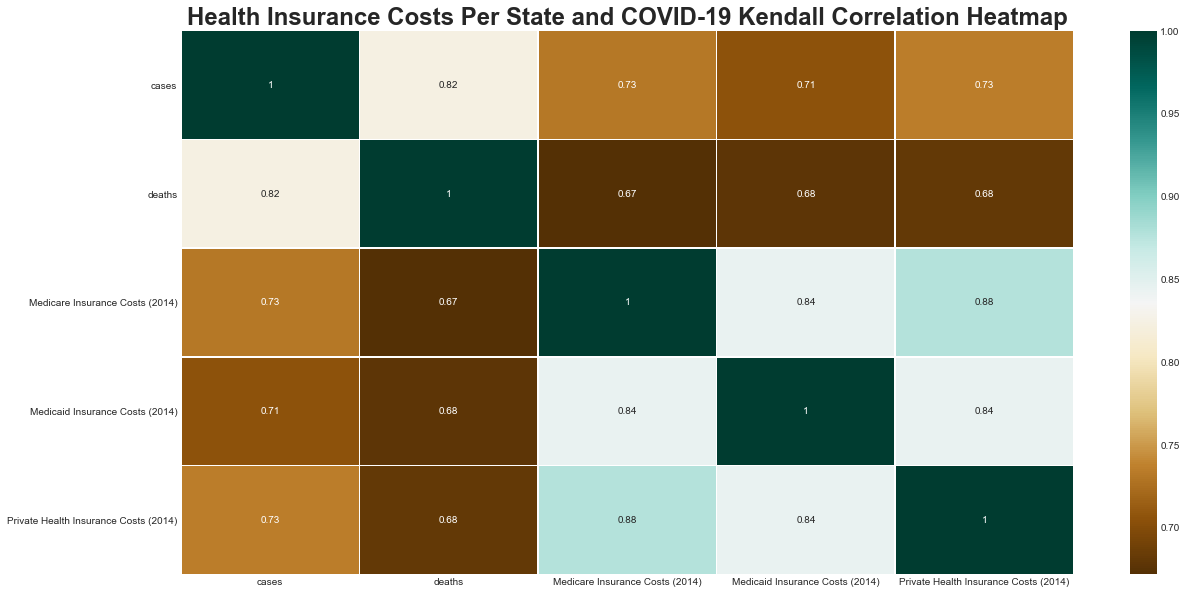

In [9]:
Kcorr = HealthInsCPSDF.corr(method = 'kendall')
Kcorr

plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Costs Per State and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

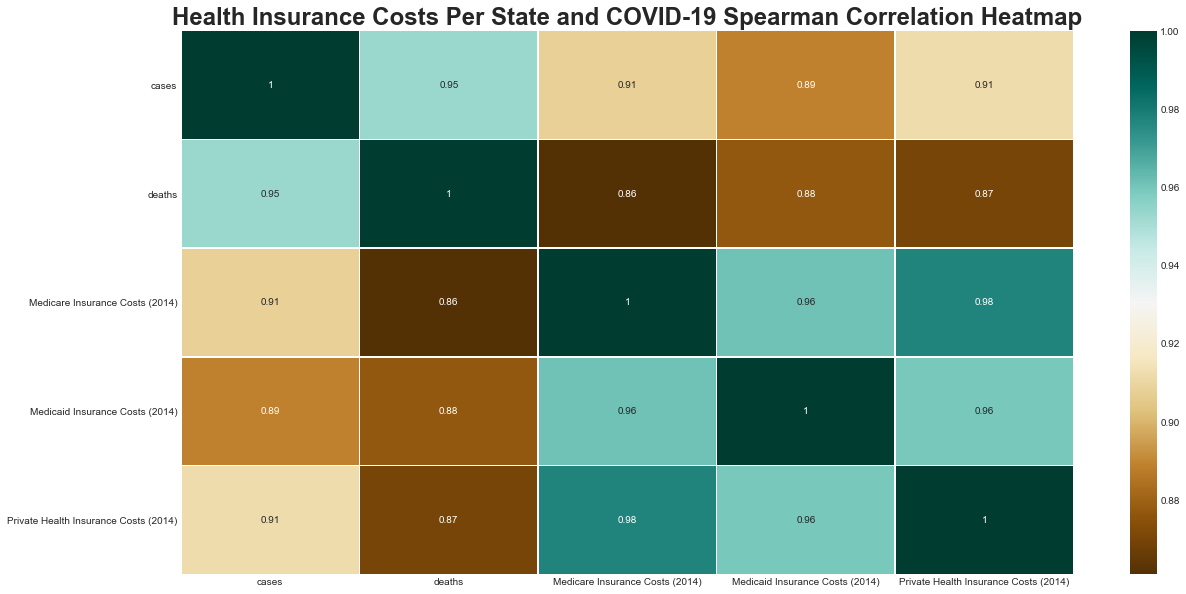

In [10]:
Scorr = HealthInsCPSDF.corr(method = 'spearman')
Scorr

plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Health Insurance Costs Per State and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [13]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Health Insurance Costs Per State'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([0,1])

AllCorr

,Health Insurance Costs Per State,Pearson Correlation,Kendall Correlation,Spearman Correlation
2,Medicare Insurance Costs (2014),0.711251,0.731765,0.907873
3,Medicaid Insurance Costs (2014),0.822284,0.705098,0.888959
4,Private Health Insurance Costs (2014),0.741608,0.734902,0.912398


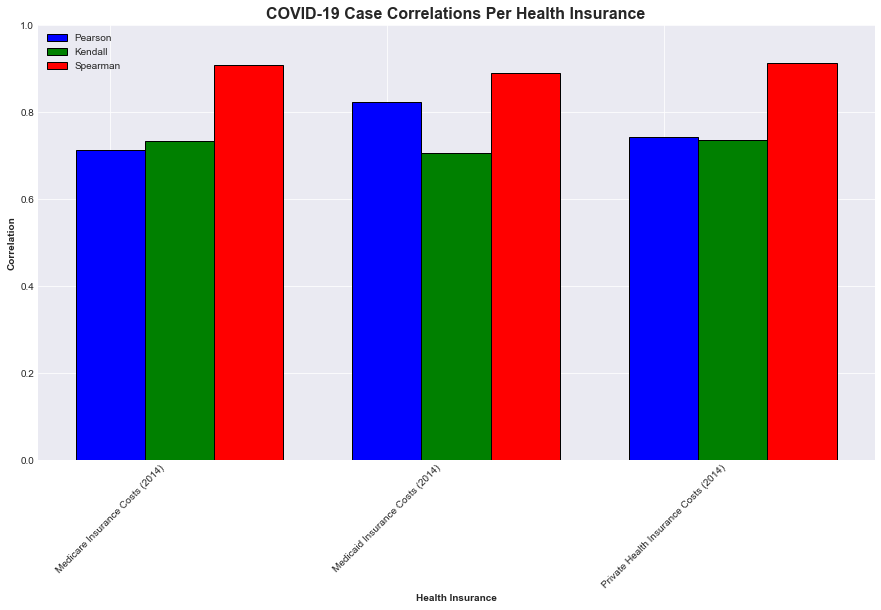

In [14]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Health Insurance Costs Per State'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Health Insurance', fontsize = 16, fontweight = 'bold')

plt.xlabel('Health Insurance', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

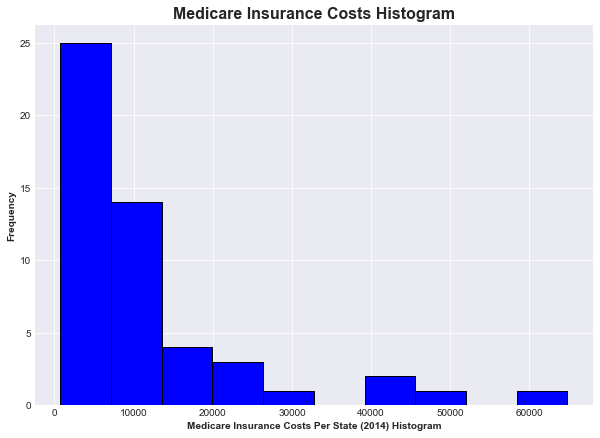

In [17]:
HealthInsCPSDF['Medicare Insurance Costs (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicare Insurance Costs Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Insurance Costs Per State (2014) Histogram', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

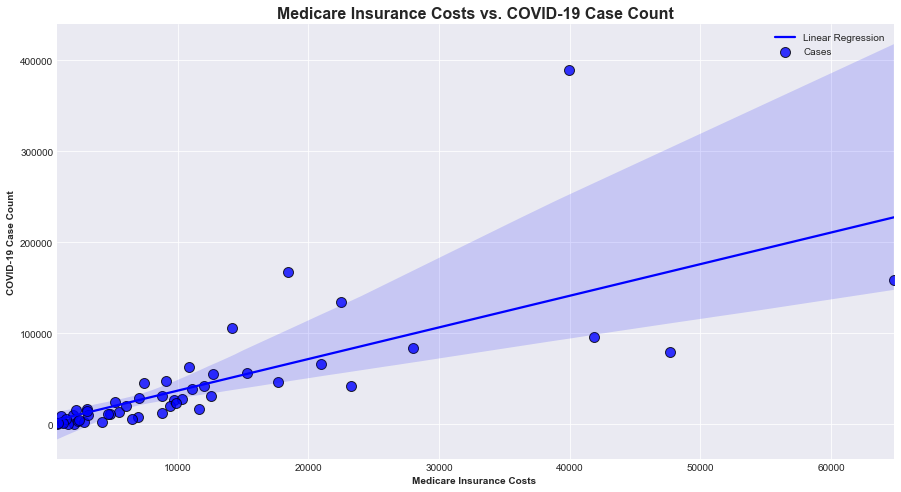

In [19]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicare Insurance Costs (2014)', y = 'cases', data = HealthInsCPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicare Insurance Costs vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicare Insurance Costs ', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [20]:
model1 = sm.OLS(HealthInsCPSDF['cases'], HealthInsCPSDF['Medicare Insurance Costs (2014)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              96.06
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    3.15e-13
Time:                        02:26:47   Log-Likelihood:                         -617.94
No. Observations:                  51   AIC:                                      1238.
Df Residuals:                      50   BIC:                                      1240.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Medicare Insurance Costs (2014)     3.5691      0.364      9.801      0.000       2.838       4.300
==============================================================================
Omnibus:                       66.837   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.833
Skew:                           3.324   Prob(JB):                    2.17e-151
Kurtosis:                      19.802   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

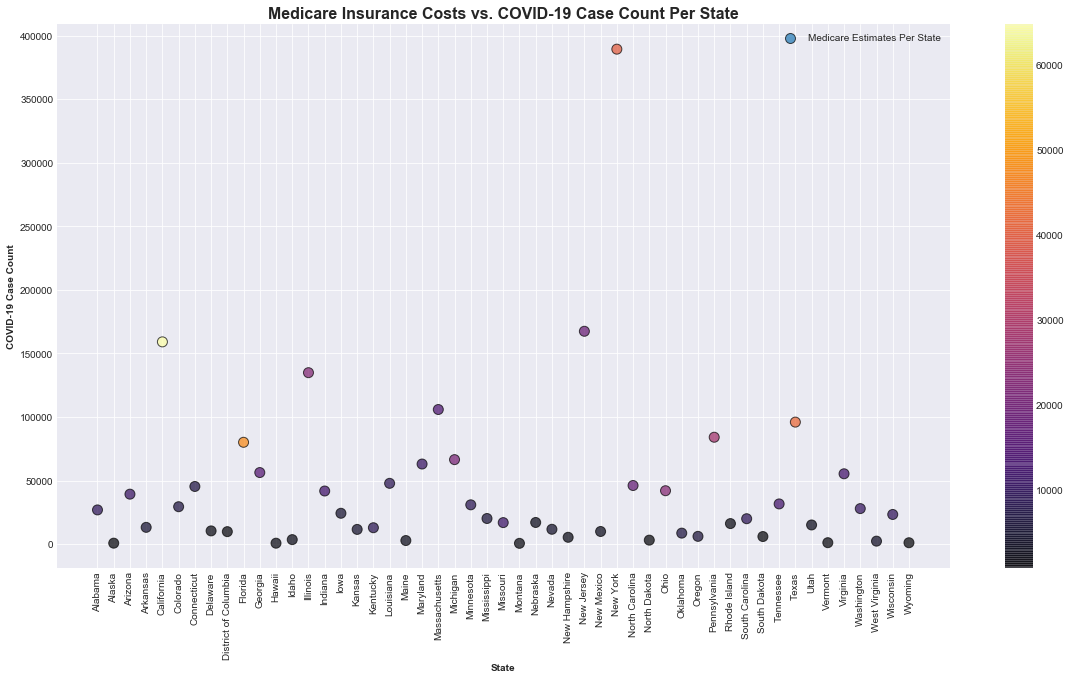

In [21]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsCPSDF['State'] 
y = HealthInsCPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = HealthInsCPSDF['Medicare Insurance Costs (2014)'], cmap = 'inferno')
plt.title('Medicare Insurance Costs vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicare Estimates Per State'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

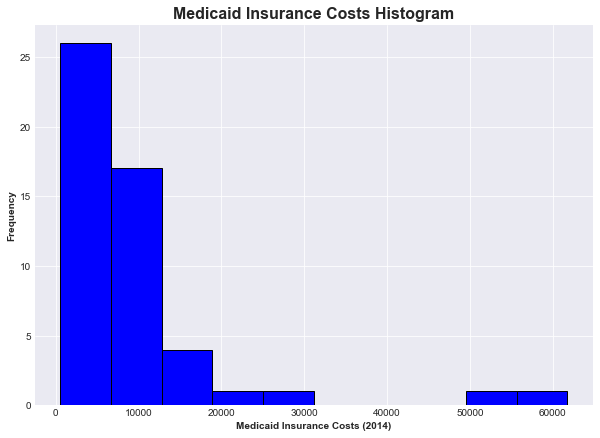

In [25]:
HealthInsCPSDF['Medicaid Insurance Costs (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Medicaid Insurance Costs Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Insurance Costs (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

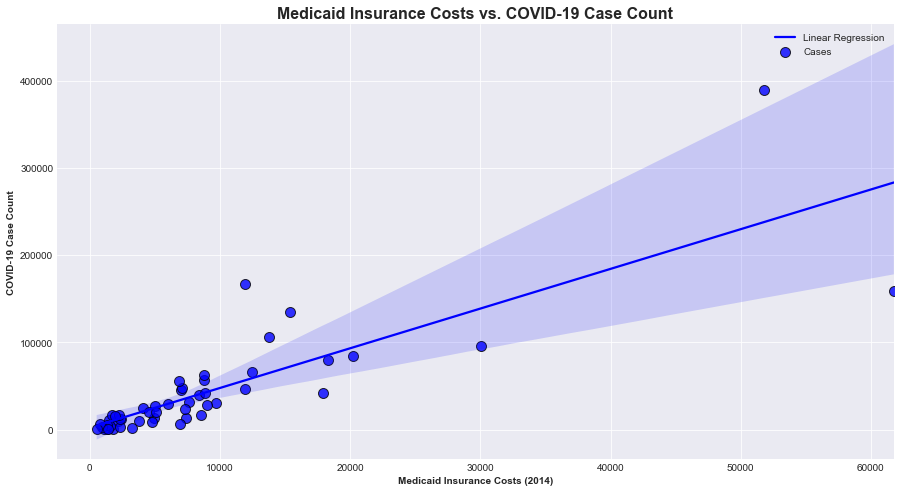

In [22]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Medicaid Insurance Costs (2014)', y = 'cases', 
            data = HealthInsCPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Medicaid Insurance Costs vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Medicaid Insurance Costs (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [26]:
model2 = sm.OLS(HealthInsCPSDF['cases'], HealthInsCPSDF['Medicaid Insurance Costs (2014)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              172.7
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    7.62e-18
Time:                        02:30:35   Log-Likelihood:                         -607.18
No. Observations:                  51   AIC:                                      1216.
Df Residuals:                      50   BIC:                                      1218.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Medicaid Insurance Costs (2014)     4.6425      0.353     13.143      0.000       3.933       5.352
==============================================================================
Omnibus:                       27.990   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.615
Skew:                           1.074   Prob(JB):                     8.83e-33
Kurtosis:                      11.053   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

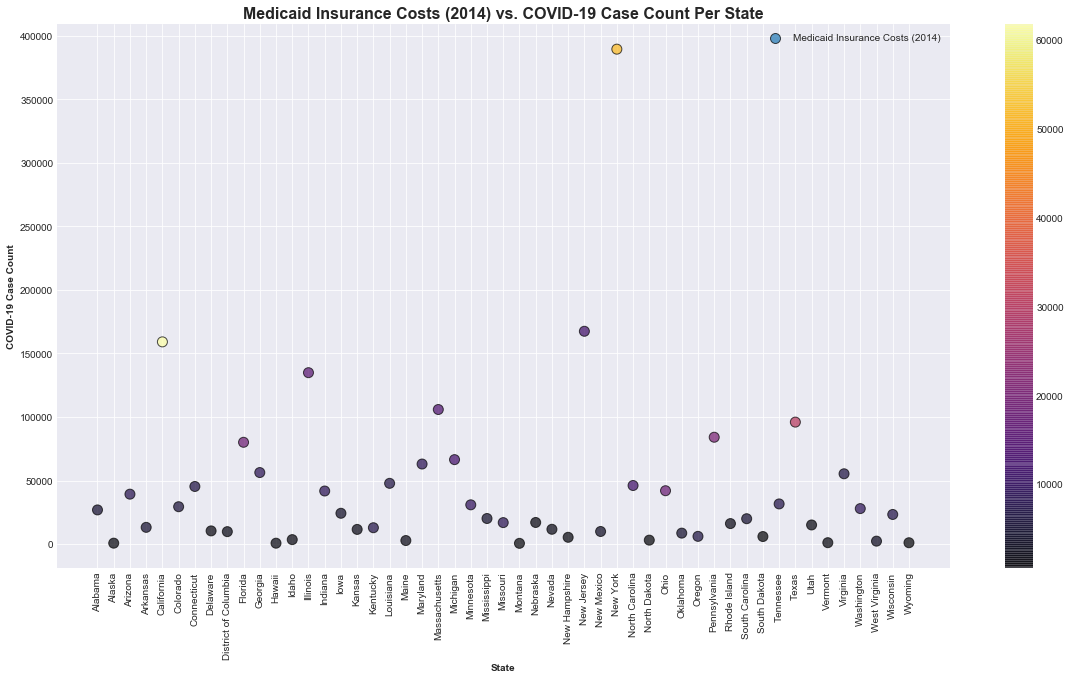

In [27]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsCPSDF['State'] 
y = HealthInsCPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100,
            c = HealthInsCPSDF['Medicaid Insurance Costs (2014)'], cmap = 'inferno')
plt.title('Medicaid Insurance Costs (2014) vs. COVID-19 Case Count Per State',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Medicaid Insurance Costs (2014)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

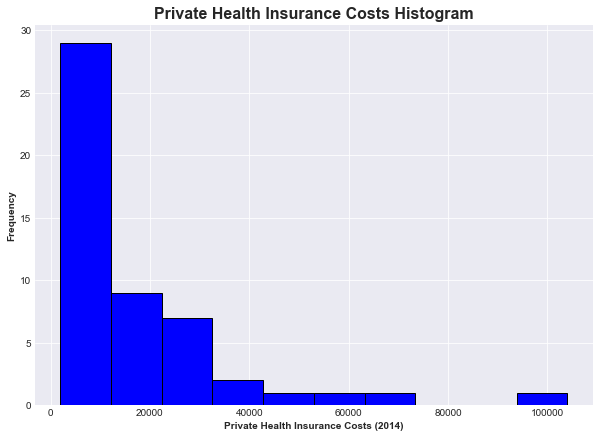

In [28]:
HealthInsCPSDF['Private Health Insurance Costs (2014)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Private Health Insurance Costs Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Health Insurance Costs (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

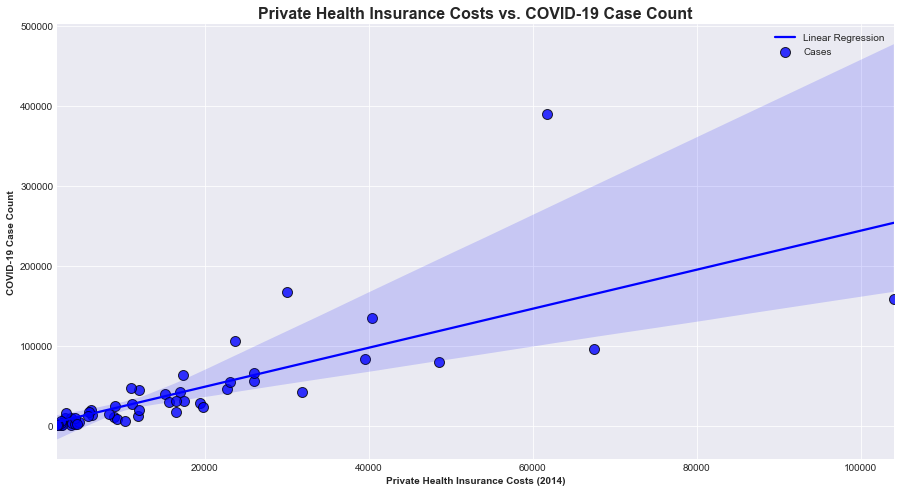

In [29]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Private Health Insurance Costs (2014)', y = 'cases',
            data = HealthInsCPSDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Private Health Insurance Costs vs. COVID-19 Case Count',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Private Health Insurance Costs (2014)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [30]:
model3 = sm.OLS(HealthInsCPSDF['cases'], HealthInsCPSDF['Private Health Insurance Costs (2014)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              110.6
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    2.85e-14
Time:                        02:37:35   Log-Likelihood:                         -615.51
No. Observations:                  51   AIC:                                      1233.
Df Residuals:                      50   BIC:                                      1235.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Private Health Insurance Costs (2014)     2.4423      0.232     10.519      0.000       1.976       2.909
==============================================================================
Omnibus:                       69.446   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              808.410
Skew:                           3.456   Prob(JB):                    2.86e-176
Kurtosis:                      21.239   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

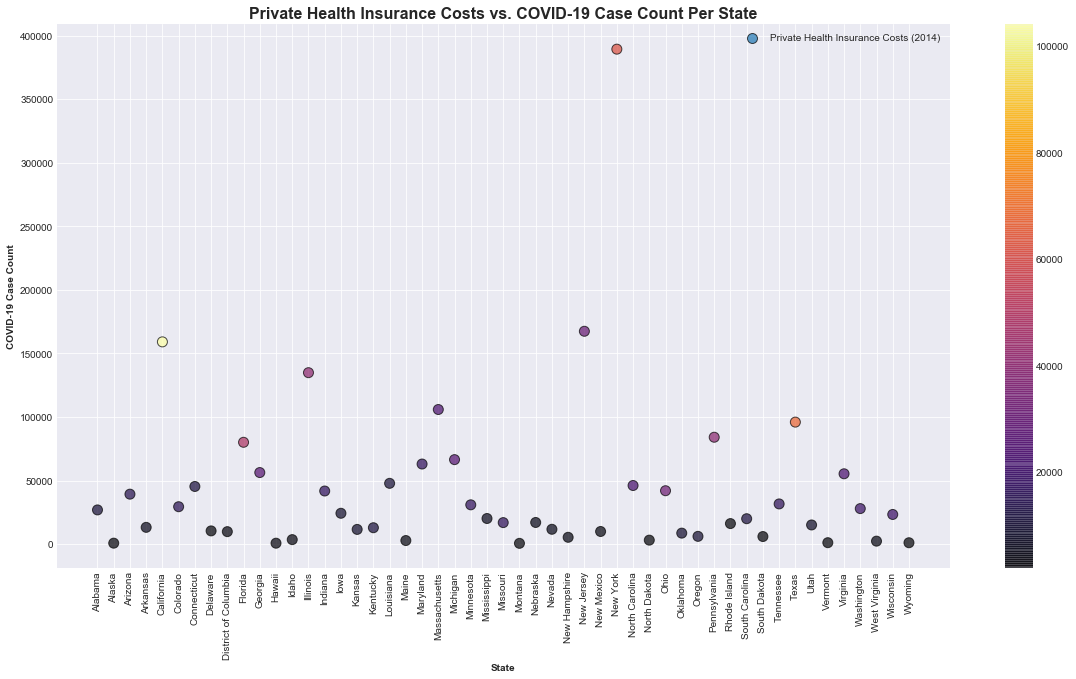

In [31]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = HealthInsCPSDF['State'] 
y = HealthInsCPSDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = HealthInsCPSDF['Private Health Insurance Costs (2014)'], cmap = 'inferno')
plt.title('Private Health Insurance Costs vs. COVID-19 Case Count Per State', fontsize = 16,
          fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Private Health Insurance Costs (2014)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [32]:
model4 = sm.OLS(HealthInsCPSDF['cases'], 
                HealthInsCPSDF[['Medicare Insurance Costs (2014)', 
                             'Medicaid Insurance Costs (2014)',
                            'Private Health Insurance Costs (2014)',]]).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              58.06
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                    5.35e-16
Time:                        02:38:50   Log-Likelihood:                         -606.20
No. Observations:                  51   AIC:                                      1218.
Df Residuals:                      48   BIC:                                      1224.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Medicare Insurance Costs (2014)          -0.2954      1.817     -0.163      0.871      -3.948       3.357
Medicaid Insurance Costs (2014)           6.4758      1.425      4.544      0.000       3.611       9.341
Private Health Insurance Costs (2014)    -0.8631      1.512     -0.571      0.571      -3.904       2.177
==============================================================================
Omnibus:                       18.842   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.227
Skew:                           0.458   Prob(JB):                     2.84e-22
Kurtosis:                       9.772   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""